In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
#below to allow for all columns in csv to display
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 1. Data Undestanding

## Import Cleaned Data

In [2]:
df = pd.read_csv('CustomerChurnDataQualitySolutionsImplemented12751005.csv')

In [3]:
#df

## 1.1 Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.

In [4]:
df_training=df.sample(frac=.7)

In [5]:
df_test=df.sample(frac=.3)

## Check partitions are correct

In [6]:
df_training.shape

(700, 28)

In [7]:
df_test.shape

(300, 28)

# 1.2 Correlations and pairwise interactions

In [8]:
df_training.dtypes

age                             int64
children                         bool
income                          int64
numHandsets                     int64
handsetAge                      int64
smartPhone                       bool
creditRating                   object
homeOwner                        bool
creditCard                       bool
avgBill                       float64
avgMins                       float64
avgrecurringCharge            float64
avgOverBundleMins             float64
avgRoamCalls                  float64
callMinutesChangePct          float64
billAmountChangePct           float64
avgReceivedMins               float64
avgOutCalls                   float64
avgInCalls                    float64
peakOffPeakRatio              float64
peakOffPeakRatioChangePct     float64
avgDroppedCalls               float64
lifeTime                        int64
lastMonthCustomerCareCalls    float64
numRetentionCalls               int64
numRetentionOffersAccepted      int64
newFrequentN

In [9]:
#Select continuous and categorical features
df_training['income'] = df_training['income'].astype('object')
continuous_columns = df_training.select_dtypes(include=['int64','float64']).columns
categorical_columns = df_training.select_dtypes(include=['bool','object']).columns
for column in categorical_columns:
    df_training[column] = df_training[column].astype('category')

In [10]:
continuous_columns

Index(['age', 'numHandsets', 'handsetAge', 'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls', 'numRetentionOffersAccepted', 'newFrequentNumbers'], dtype='object')

In [11]:
df[continuous_columns].corr()

,age,numHandsets,handsetAge,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
age,1.000000,-0.031826,0.055409,-0.049863,-0.099546,-0.086614,-0.014825,0.007102,-0.018893,0.008435,-0.086306,-0.097544,-0.058644,0.059483,-0.001107,-0.045371,0.033603,-0.045532,0.023512,0.035292,-0.003682
numHandsets,-0.031826,1.000000,-0.332889,0.250042,0.283311,0.219915,0.144897,0.021034,0.012002,-0.014988,0.219437,0.267328,0.263549,0.022002,-0.069649,0.198815,0.342029,0.125814,0.139248,0.105626,0.110433
handsetAge,0.055409,-0.332889,1.000000,-0.235615,-0.300545,-0.272525,-0.118055,-0.032038,-0.012484,-0.038921,-0.239537,-0.235854,-0.200127,0.115361,0.017217,-0.207074,0.508712,-0.160692,-0.033583,-0.041720,0.028503
avgBill,-0.049863,0.250042,-0.235615,1.000000,0.739110,0.628102,0.798825,0.271562,0.032280,-0.041174,0.625931,0.496604,0.420513,0.029327,0.008424,0.441503,-0.036884,0.214989,0.045404,0.009708,-0.002851
avgMins,-0.099546,0.283311,-0.300545,0.739110,1.000000,0.562282,0.634231,0.139881,0.016085,0.020963,0.816160,0.713702,0.595358,-0.102880,-0.001677,0.552012,-0.122577,0.430256,0.021956,0.028520,-0.031689
avgrecurringCharge,-0.086614,0.219915,-0.272525,0.628102,0.562282,1.000000,0.241498,0.094962,0.041422,0.044910,0.457809,0.410675,0.332208,0.025138,-0.002711,0.304768,-0.075960,0.166599,-0.020200,0.007442,-0.044820
avgOverBundleMins,-0.014825,0.144897,-0.118055,0.798825,0.634231,0.241498,1.000000,0.137081,0.071224,0.006898,0.564397,0.396638,0.343611,-0.002165,0.031614,0.341665,-0.051218,0.150900,0.018870,-0.002998,0.011917
avgRoamCalls,0.007102,0.021034,-0.032038,0.271562,0.139881,0.094962,0.137081,1.000000,-0.103282,-0.131338,0.108020,0.060994,-0.008727,0.036653,0.038978,0.061192,0.009783,-0.012285,0.024583,-0.002911,-0.015492
callMinutesChangePct,-0.018893,0.012002,-0.012484,0.032280,0.016085,0.041422,0.071224,-0.103282,1.000000,0.670368,-0.065212,-0.037141,-0.015742,-0.006580,0.005466,-0.050097,-0.021143,0.032425,-0.050204,-0.028377,0.049874
billAmountChangePct,0.008435,-0.014988,-0.038921,-0.041174,0.020963,0.044910,0.006898,-0.131338,0.670368,1.000000,-0.017276,-0.038056,-0.009805,-0.009695,0.012987,-0.035828,-0.044235,0.021613,-0.102504,-0.062672,0.052314


It is clear that some features are correlated with one another.As such it may be a good idea to avoid including correlated features in the model since linear models rely on the assumption that features are independent[1]
[1]https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb 'Feature Selection'

In [12]:
df_training

,age,children,income,numHandsets,handsetAge,smartPhone,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn
448,30,False,4,1,294,True,B,True,False,34.99,113.50,44.99,0.00,0.00,1.310,0.0000,14.55,10.33,4.67,0.723038,-2.306595,1.33,10,0.00,0,0,0,False
945,44,True,9,1,411,True,B,False,True,103.46,641.00,66.25,177.00,1.27,-7.400,-2.0692,152.98,67.67,20.00,3.695704,-7.038342,21.33,14,0.00,0,0,0,True
695,50,False,7,1,401,True,B,False,True,39.19,372.50,39.99,20.00,2.20,-2.690,-0.1840,0.00,0.00,0.00,0.000000,-0.646821,0.00,14,0.00,0,0,0,False
27,34,False,0,4,66,True,F,True,False,62.63,678.25,49.99,5.75,0.00,4.695,-0.0374,98.46,13.00,1.00,1.876813,-0.928734,9.67,18,0.00,0,0,0,True
494,44,False,3,1,518,True,B,False,True,124.10,903.75,84.99,148.50,0.00,18.125,2.2710,212.94,28.00,10.00,12.410385,-4.696208,14.67,17,0.33,0,0,0,False
900,58,True,7,1,904,False,A,False,True,32.12,35.75,29.99,0.00,1.88,-0.395,-0.0426,0.52,0.67,0.00,0.892819,-0.493359,0.33,30,0.00,0,0,3,True
262,26,False,7,1,1087,True,C,False,True,51.15,345.50,50.00,3.00,0.00,-1.670,-0.0230,97.62,21.33,12.67,1.786896,-11.941604,4.67,36,0.00,0,0,1,False
67,40,False,8,2,170,True,B,False,False,88.68,742.00,44.99,152.50,0.00,1.560,0.6762,235.56,53.67,28.67,1.169167,6.589607,21.00,7,0.00,0,0,0,False
672,32,False,6,2,216,True,D,False,True,56.04,315.00,41.98,67.25,0.00,-1.580,-0.3780,93.88,3.00,0.00,3.675314,10.983338,3.00,12,0.00,0,0,0,True
553,38,False,6,1,677,True,B,False,True,44.34,163.50,29.99,41.00,0.00,-0.090,-0.0490,10.17,9.00,1.33,1.947368,-15.979181,5.67,23,0.00,0,0,0,False


In [13]:
df_training['churn_float']=df_training['churn'].astype('float64')

In [14]:
df_training[['age','churn_float']].corr()

,age,churn_float
age,1.000000,0.025698
churn_float,0.025698,1.000000


In [15]:
corrs_with_churn={}
for i in continuous_columns:
    corrs_with_churn[i]=df_training[[i,'churn_float']].corr().as_matrix()[0,1]

In [16]:
corrs_with_churn

{'age': 0.02569757346709898,
 'avgBill': -0.012320408424224017,
 'avgDroppedCalls': -0.053719313345854586,
 'avgInCalls': 0.005704335963808162,
 'avgMins': -0.05151761745207557,
 'avgOutCalls': -0.042249962759443524,
 'avgOverBundleMins': 0.006940556321363186,
 'avgReceivedMins': -0.05796377809249215,
 'avgRoamCalls': 0.050081235309918176,
 'avgrecurringCharge': -0.07125706665763999,
 'billAmountChangePct': -0.0005655895556856372,
 'callMinutesChangePct': 0.0008046829543841474,
 'handsetAge': 0.06253515965410061,
 'lastMonthCustomerCareCalls': -0.0661527446931882,
 'lifeTime': -0.027940743230759686,
 'newFrequentNumbers': -0.027513299284718087,
 'numHandsets': -0.02952399370255199,
 'numRetentionCalls': 0.07173754653161626,
 'numRetentionOffersAccepted': 0.05108073741058312,
 'peakOffPeakRatio': -0.06007497231149899,
 'peakOffPeakRatioChangePct': 0.004639261907404227}

In [17]:
#https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
import operator
#retrieving 6 largest correlations
largest_positive_correlations={}
largest_negative_correlations={}
for i in range(6):
    #retrieve 3 largest positive correlation
    largest_positive_correlations[max(corrs_with_churn.items(),key=operator.itemgetter(1))[0]]=max(corrs_with_churn.items(),key=operator.itemgetter(1))[1]
    del corrs_with_churn[max(corrs_with_churn.items(),key=operator.itemgetter(1))[0]]
    #retrieve 3 largest negative correlations
    largest_negative_correlations[min(corrs_with_churn.items(),key=operator.itemgetter(1))[0]]=min(corrs_with_churn.items(),key=operator.itemgetter(1))[1]
    del corrs_with_churn[min(corrs_with_churn.items(),key=operator.itemgetter(1))[0]]

In [18]:
largest_positive_correlations

{'age': 0.02569757346709898,
 'avgOverBundleMins': 0.006940556321363186,
 'avgRoamCalls': 0.050081235309918176,
 'handsetAge': 0.06253515965410061,
 'numRetentionCalls': 0.07173754653161626,
 'numRetentionOffersAccepted': 0.05108073741058312}

In [19]:
largest_negative_correlations

{'avgDroppedCalls': -0.053719313345854586,
 'avgMins': -0.05151761745207557,
 'avgReceivedMins': -0.05796377809249215,
 'avgrecurringCharge': -0.07125706665763999,
 'lastMonthCustomerCareCalls': -0.0661527446931882,
 'peakOffPeakRatio': -0.06007497231149899}

In [20]:
df_training[['avgMins', 'churn_float']].corr().as_matrix()[0,1]

-0.05151761745207557

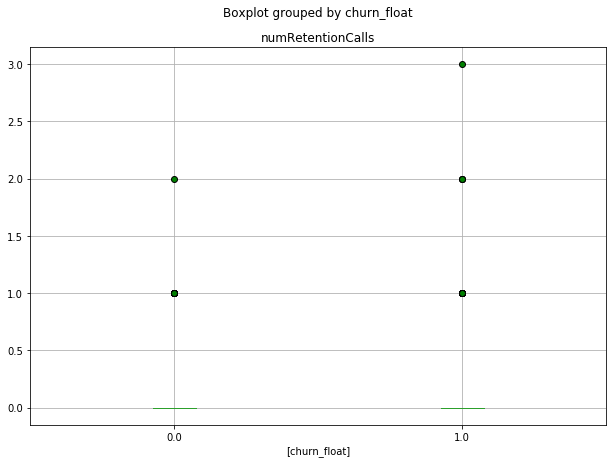

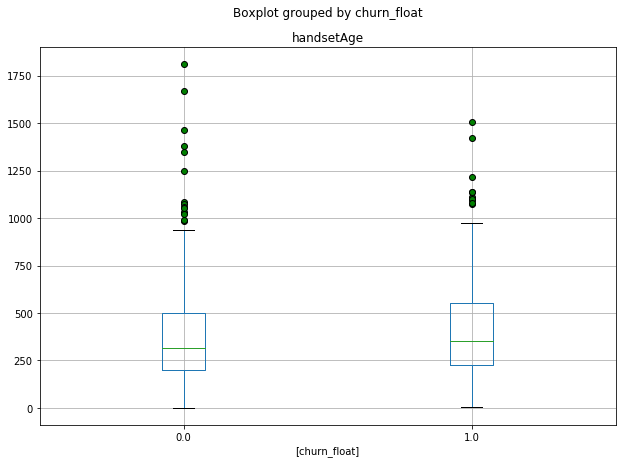

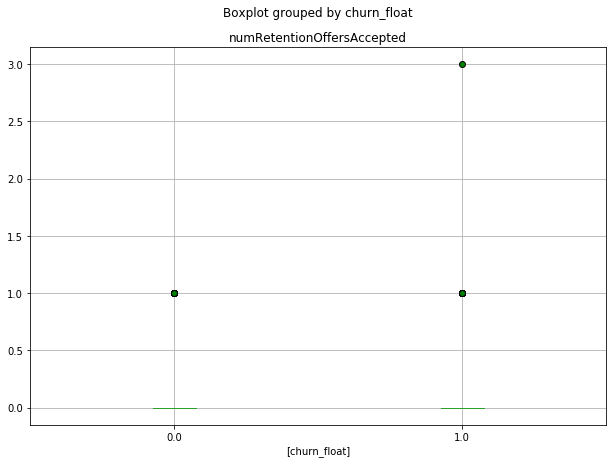

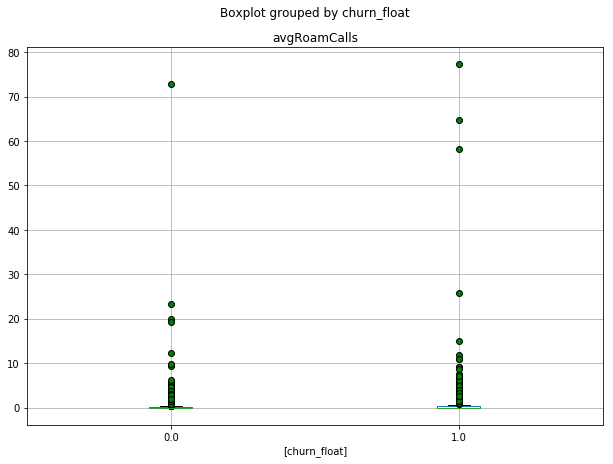

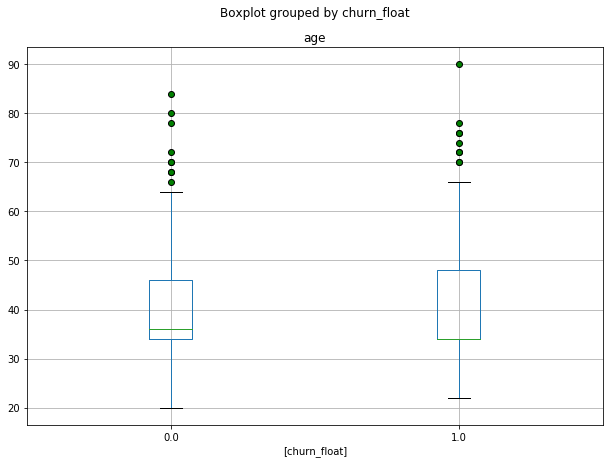

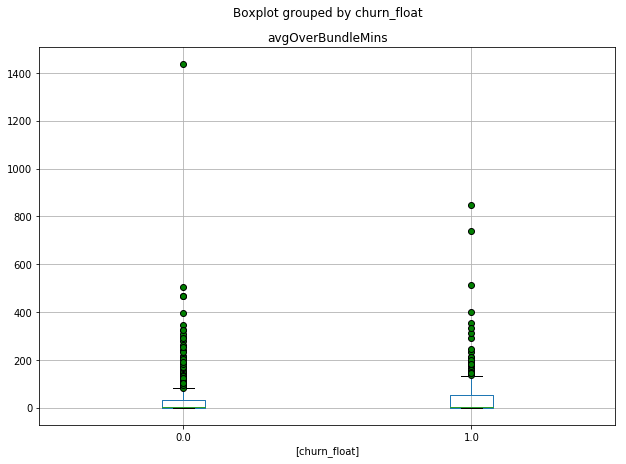

In [21]:
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
for k in largest_positive_correlations:
    bp = df_training.boxplot(column=[k], by=['churn_float'], flierprops=flierprops, figsize=(10,7))

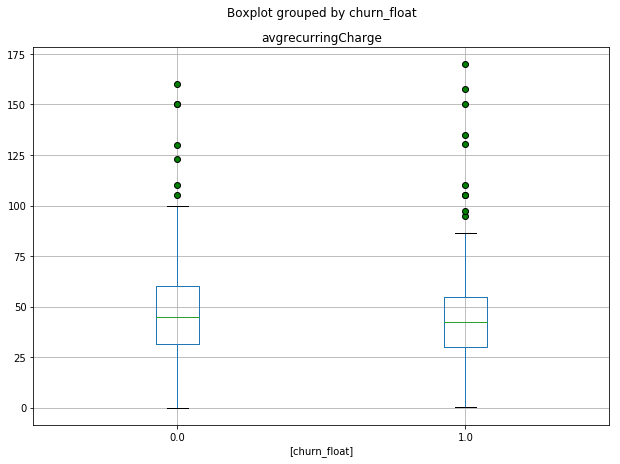

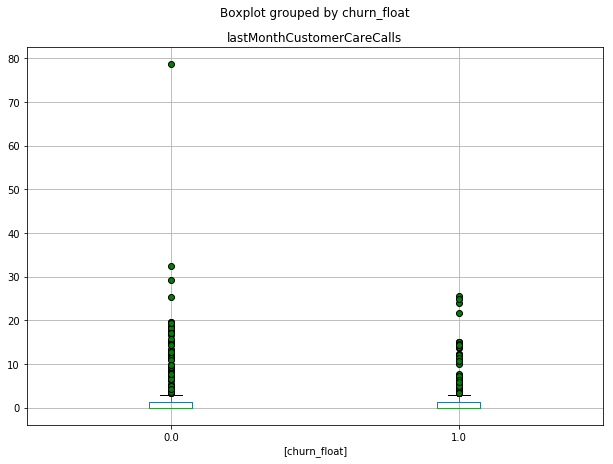

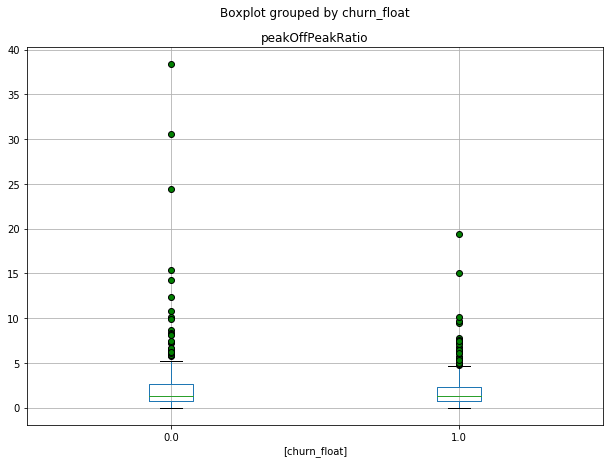

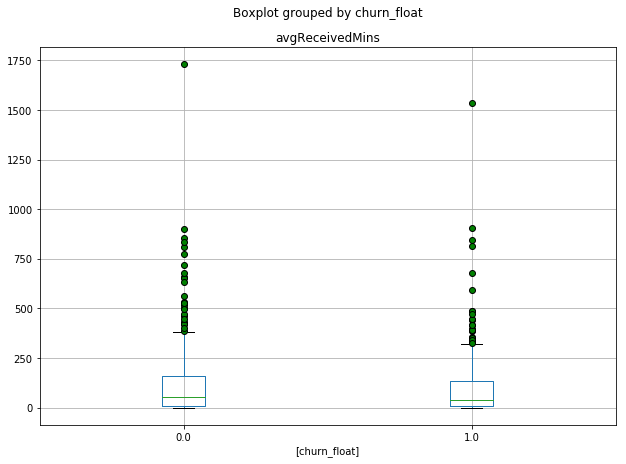

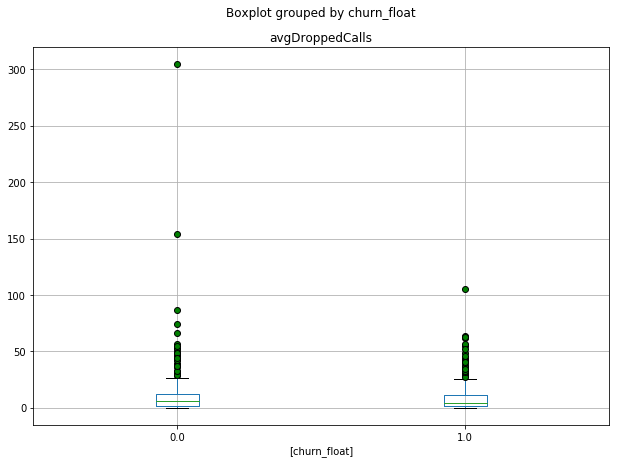

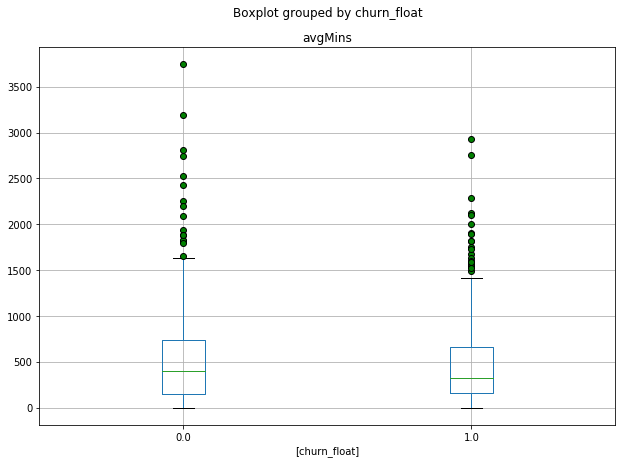

In [22]:
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
for k in largest_negative_correlations:
    bp = df_training.boxplot(column=[k], by=['churn_float'], flierprops=flierprops, figsize=(10,7))

(0, 100)

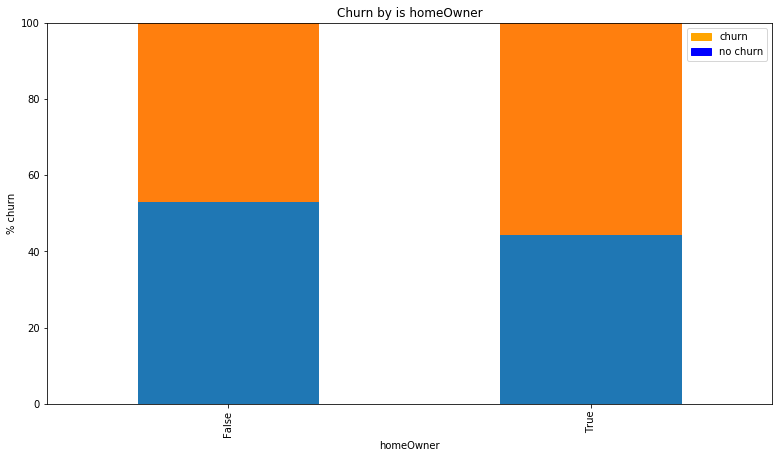

In [23]:
"""
Taken from Lab4
"""

homeOwner = 1 / df_training[df_training.homeOwner == True].count()['homeOwner']
nohomeOwner = 1 / df_training[df_training.homeOwner == False].count()['homeOwner']
df_training['percent'] = homeOwner * 100

index_list = df_training[df_training['homeOwner'] == False].index.tolist()

for i in index_list:
    df_training.loc[i, 'percent'] = nohomeOwner * 100

category_group = df_training[['percent','homeOwner','churn']].groupby(['homeOwner','churn']).sum()

my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by is homeOwner", figsize=(13,7))

red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)


my_plot.set_xlabel("homeOwner")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

In [24]:
categorical_columns

Index(['children', 'income', 'smartPhone', 'creditRating', 'homeOwner', 'creditCard', 'churn'], dtype='object')

(0, 100)

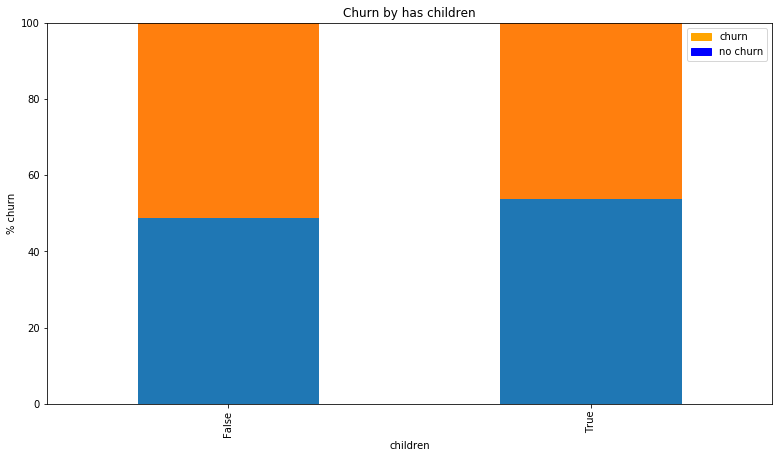

In [25]:
"""
Taken from Lab4
"""
# Count the number of customers with children
children = 1 / df_training[df_training.children == True].count()['children']

noChildren = 1 / df_training[df_training.children == False].count()['children']

# Create a new column in the dataframe called percent and insert children in all cells
df_training['percent'] = children * 100

# Find indexes of all rows containing False for children
index_list = df_training[df_training['children'] == False].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df_training.loc[i, 'percent'] = noChildren * 100

# Group dataframe by children and churn and sum precent
category_group = df_training[['percent','children','churn']].groupby(['children','churn']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has children", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("children")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

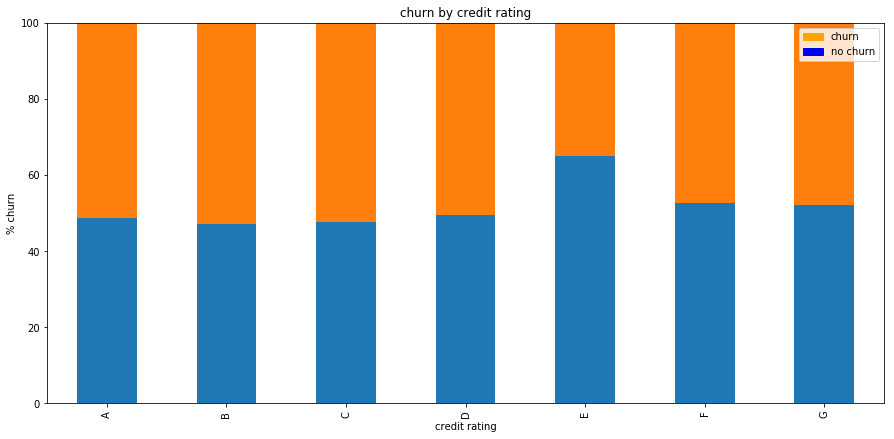

In [26]:
"""
Taken from Lab4
"""
# Find unique values in creditRating
credit = pd.unique(df_training.creditRating.ravel())

# Insert a new column called 'percent' and fill it with 0s
df_training['percent'] = 0

# Iterate through the unique values in Party and for each value count the amount of elected candidates
# Find the indexes of each row with a particular party amd for each of these row insert count * 100 in the percent column
for p in credit:
    count = 1 / df_training[df_training.creditRating == p].count()['churn']
    index_list = df_training[df_training['creditRating'] == p].index.tolist()
    for i in index_list:
        df_training.loc[i, 'percent'] = count * 100
        
# Group dataframe by Party and Elected and sum percent
group = df_training[['percent','creditRating','churn']].groupby(['creditRating','churn']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="churn by credit rating", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("credit rating")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

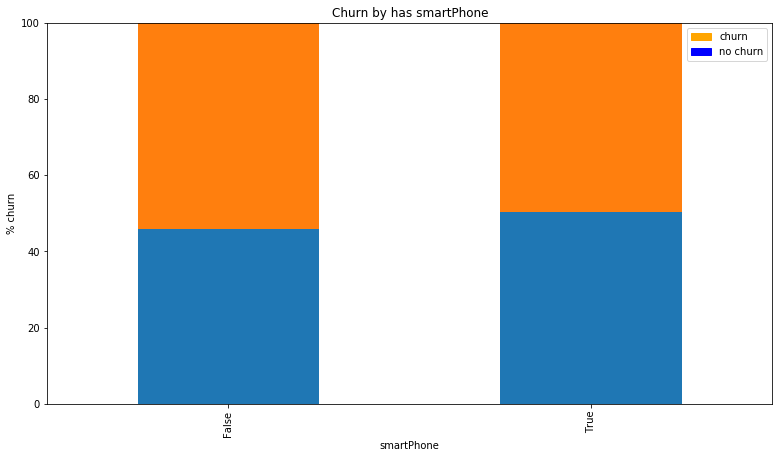

In [27]:
"""
Taken from Lab4
"""
smart_phone = 1 / df_training[df_training.smartPhone == True].count()['smartPhone']
nosmartPhone = 1 / df_training[df_training.smartPhone == False].count()['smartPhone']
df_training['percent'] = smart_phone * 100
index_list = df_training[df_training['smartPhone'] == False].index.tolist()
for i in index_list:
    df_training.loc[i, 'percent'] = nosmartPhone * 100
category_group = df_training[['percent','smartPhone','churn']].groupby(['smartPhone','churn']).sum()
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has smartPhone", figsize=(13,7))
red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.set_xlabel("smartPhone")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

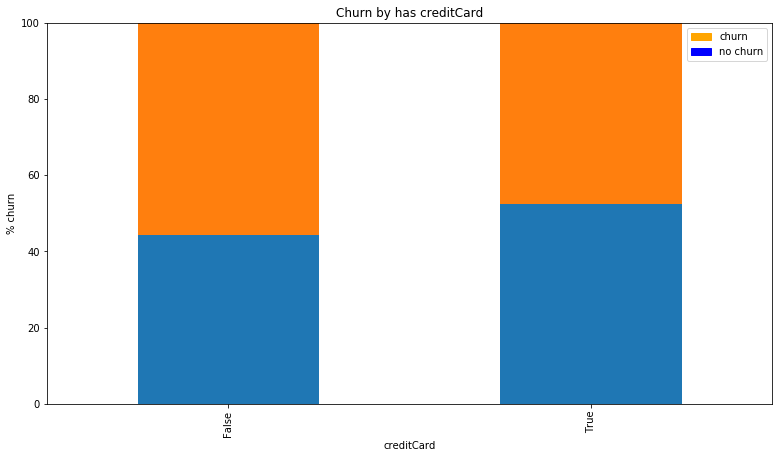

In [28]:
"""
Taken from Lab4
"""
creditCard = 1 / df_training[df_training.creditCard == True].count()['creditCard']
nocreditCard = 1 / df_training[df_training.creditCard == False].count()['creditCard']

df_training['percent'] = creditCard * 100

index_list = df_training[df_training['creditCard'] == False].index.tolist()

for i in index_list:
    df_training.loc[i, 'percent'] = nocreditCard * 100

category_group = df_training[['percent','creditCard','churn']].groupby(['creditCard','churn']).sum()

my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Churn by has creditCard", figsize=(13,7))

red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("creditCard")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

(0, 100)

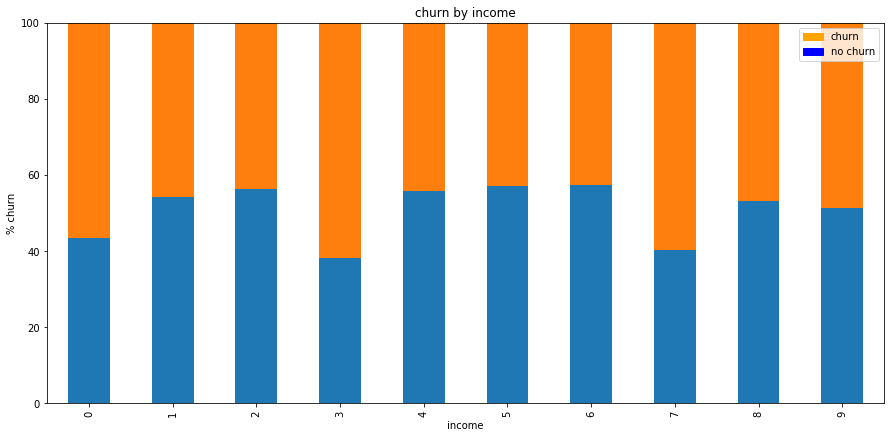

In [29]:
"""
Taken from Lab4
"""
# Find unique values in creditRating
income = pd.unique(df_training.income.ravel())

# Insert a new column called 'percent' and fill it with 0s
df_training['percent'] = 0

# Iterate through the unique values in Party and for each value count the amount of elected candidates
# Find the indexes of each row with a particular party amd for each of these row insert count * 100 in the percent column
for p in income:
    count = 1 / df_training[df_training.income == p].count()['churn']
    index_list = df_training[df_training['income'] == p].index.tolist()
    for i in index_list:
        df_training.loc[i, 'percent'] = count * 100
        
# Group dataframe by Party and Elected and sum percent
group = df_training[['percent','income','churn']].groupby(['income','churn']).sum()

# Plot values of group in a stacked bar chart
my_plot = group.unstack().plot(kind='bar', stacked=True, title="churn by income", figsize=(15,7))

# Define label colours and text and add to the plot
red_patch = mpatches.Patch(color='orange', label='churn')
blue_patch = mpatches.Patch(color='blue', label='no churn')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("income")
my_plot.set_ylabel("% churn")
my_plot.set_ylim([0,100])

In [30]:
df_temp_credit = df_training[df_training['creditCard']==True]

df_temp_credit.shape

(475, 30)

In [31]:
df_temp_homeOwner = df_training[df_training['homeOwner']==True]

df_temp_homeOwner.shape

(248, 30)

In [32]:
df_temp_smartPhone = df_training[df_training['smartPhone']==True]

df_temp_smartPhone.shape

(626, 30)

Promising continuous features:
age, avgReceivedMins - because of all minutes measurements this is the most interesting to me. A customer who is receiving a lot of calls probably does not want to switch network since those calling them may be charged more on the new network or currently have free calls to the customer etc.
Promising categorical features:
creditCard, smartPhone, homeOwner

In [33]:
"""
From Lab 6
"""
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

In [34]:
#https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
#Handling Categorical Predictors with Two Categories
import numpy as np

In [35]:
lm = sm.ols(formula="churn_float ~ C(homeOwner) + avgReceivedMins + avgrecurringCharge", data=df_training).fit()
#lm = sm.ols(formula="churn_float ~ C(homeOwner) + avgrecurringCharge", data=df_training).fit()
#lm = sm.ols(formula="churn_float ~ C(homeOwner) + avgrecurringCharge + avgReceivedMins", data=df_training).fit()
#lm = sm.ols(formula="churn_float ~ C(homeOwner)", data=df_training).fit()
#lm = sm.ols(formula="churn_float ~ C(homeOwner) + avgrecurringCharge", data=df_training).fit()
#lm = sm.ols(formula="churn_float ~ avgReceivedMins + newFrequentNumbers+lifeTime+avgOutCalls+avgInCalls + avgBill + billAmountChangePct + avgMins +avgOverBundleMins + avgRoamCalls +numRetentionCalls", data=df_training).fit()

In [36]:
continuous_columns

Index(['age', 'numHandsets', 'handsetAge', 'avgBill', 'avgMins', 'avgrecurringCharge', 'avgOverBundleMins', 'avgRoamCalls', 'callMinutesChangePct', 'billAmountChangePct', 'avgReceivedMins', 'avgOutCalls', 'avgInCalls', 'peakOffPeakRatio', 'peakOffPeakRatioChangePct', 'avgDroppedCalls', 'lifeTime', 'lastMonthCustomerCareCalls', 'numRetentionCalls', 'numRetentionOffersAccepted', 'newFrequentNumbers'], dtype='object')

In [37]:
df_training['smartPhone']

448     True
945     True
695     True
27      True
494     True
900    False
262     True
67      True
672     True
553     True
369    False
969     True
955     True
577     True
551     True
259     True
456     True
914     True
389     True
635     True
870    False
776     True
547     True
548     True
360     True
437     True
81      True
469     True
220     True
283     True
       ...  
869     True
961     True
745     True
751     True
338    False
698     True
19      True
677     True
425     True
842     True
799    False
394     True
887     True
788     True
66      True
355     True
866     True
860     True
120     True
455     True
941     True
753     True
314     True
48      True
370     True
123     True
675     True
963     True
170     True
817     True
Name: smartPhone, Length: 700, dtype: category
Categories (2, object): [False, True]

In [38]:
# Print the weights learned for each feature.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            churn_float   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.210
Date:                Sun, 01 Apr 2018   Prob (F-statistic):             0.0226
Time:                        14:04:49   Log-Likelihood:                -503.24
No. Observations:                 700   AIC:                             1014.
Df Residuals:                     696   BIC:                             1033.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5421 

In [39]:
# The model learned is: RentalPrice = 6.46690 + 0.62064 * Size
# This means that for a unit increase in Size, we have a 0.62064 increase in RentalPrice.
# We can use the learned model to predict the RentalPrice for a new office Size.

# The Statsmodels predict() method expects a dataframe object.
# Create a new dataframe with a new test example. 
X_new = pd.DataFrame({'homeOwner': [True],'age':[46],'avgReceivedMins':[63.10]})
X_new.head()

,age,avgReceivedMins,homeOwner
0,46,63.1,True


In [40]:
df_training.head(10)

,age,children,income,numHandsets,handsetAge,smartPhone,creditRating,homeOwner,creditCard,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers,churn,churn_float,percent
448,30,False,4,1,294,True,B,True,False,34.99,113.50,44.99,0.00,0.00,1.310,0.0000,14.55,10.33,4.67,0.723038,-2.306595,1.33,10,0.00,0,0,0,False,0.0,1.694915
945,44,True,9,1,411,True,B,False,True,103.46,641.00,66.25,177.00,1.27,-7.400,-2.0692,152.98,67.67,20.00,3.695704,-7.038342,21.33,14,0.00,0,0,0,True,1.0,1.428571
695,50,False,7,1,401,True,B,False,True,39.19,372.50,39.99,20.00,2.20,-2.690,-0.1840,0.00,0.00,0.00,0.000000,-0.646821,0.00,14,0.00,0,0,0,False,0.0,1.219512
27,34,False,0,4,66,True,F,True,False,62.63,678.25,49.99,5.75,0.00,4.695,-0.0374,98.46,13.00,1.00,1.876813,-0.928734,9.67,18,0.00,0,0,0,True,1.0,0.558659
494,44,False,3,1,518,True,B,False,True,124.10,903.75,84.99,148.50,0.00,18.125,2.2710,212.94,28.00,10.00,12.410385,-4.696208,14.67,17,0.33,0,0,0,False,0.0,2.941176
900,58,True,7,1,904,False,A,False,True,32.12,35.75,29.99,0.00,1.88,-0.395,-0.0426,0.52,0.67,0.00,0.892819,-0.493359,0.33,30,0.00,0,0,3,True,1.0,1.219512
262,26,False,7,1,1087,True,C,False,True,51.15,345.50,50.00,3.00,0.00,-1.670,-0.0230,97.62,21.33,12.67,1.786896,-11.941604,4.67,36,0.00,0,0,1,False,0.0,1.219512
67,40,False,8,2,170,True,B,False,False,88.68,742.00,44.99,152.50,0.00,1.560,0.6762,235.56,53.67,28.67,1.169167,6.589607,21.00,7,0.00,0,0,0,False,0.0,3.125000
672,32,False,6,2,216,True,D,False,True,56.04,315.00,41.98,67.25,0.00,-1.580,-0.3780,93.88,3.00,0.00,3.675314,10.983338,3.00,12,0.00,0,0,0,True,1.0,0.645161
553,38,False,6,1,677,True,B,False,True,44.34,163.50,29.99,41.00,0.00,-0.090,-0.0490,10.17,9.00,1.33,1.947368,-15.979181,5.67,23,0.00,0,0,0,False,0.0,0.645161


In [41]:
lm.predict(df_training)

448    0.572996
945    0.438726
695    0.489886
27     0.557223
494    0.407636
900    0.502897
262    0.466057
67     0.457415
672    0.476949
553    0.501834
369    0.574744
969    0.502417
955    0.465886
577    0.488477
551    0.495643
259    0.495641
456    0.542596
914    0.574500
389    0.591684
635    0.573196
870    0.633380
776    0.502534
547    0.478865
548    0.499238
360    0.477891
437    0.564677
81     0.482585
469    0.477512
220    0.493934
283    0.386058
         ...   
869    0.493165
961    0.557894
745    0.279138
751    0.578505
338    0.502769
698    0.591845
19     0.537384
677    0.500008
425    0.381746
842    0.571910
799    0.496296
394    0.483834
887    0.502632
788    0.489991
66     0.458583
355    0.453962
866    0.419993
860    0.496756
120    0.446137
455    0.488444
941    0.489886
753    0.571325
314    0.474384
48     0.468546
370    0.442042
123    0.574598
675    0.565780
963    0.476668
170    0.478517
817    0.463009
Length: 700, dtype: floa

In [42]:
predict_df_train = pd.DataFrame({'ActualChurn': df_training.churn_float, 'PredictedChurn': lm.predict(df_training)})
predict_df_train

,ActualChurn,PredictedChurn
448,0.0,0.572996
945,1.0,0.438726
695,0.0,0.489886
27,1.0,0.557223
494,0.0,0.407636
900,1.0,0.502897
262,0.0,0.466057
67,0.0,0.457415
672,1.0,0.476949
553,0.0,0.501834


In [43]:
df = pd.DataFrame({'ActualChurn': predict_df_train.ActualChurn, 'PredictedChurn': predict_df_train.PredictedChurn,
                  'AbsDiff':abs(predict_df_train.ActualChurn-predict_df_train.PredictedChurn)})

In [44]:
df_test_performance = df[df['AbsDiff']<0.5]

In [45]:
df_test_performance.shape

(387, 3)

In [46]:
#Pair the actual and the predicted values
print("Actual - Predicted:\n", (df_training.churn_float - lm.predict(df_training)))
print("\n(Actual - Predicted) squared:\n", (df_training.churn_float - lm.predict(df_training))**2)

Actual - Predicted:
 448   -0.572996
945    0.561274
695   -0.489886
27     0.442777
494   -0.407636
900    0.497103
262   -0.466057
67    -0.457415
672    0.523051
553   -0.501834
369   -0.574744
969    0.497583
955   -0.465886
577    0.511523
551   -0.495643
259   -0.495641
456    0.457404
914   -0.574500
389    0.408316
635   -0.573196
870   -0.633380
776   -0.502534
547    0.521135
548   -0.499238
360   -0.477891
437    0.435323
81    -0.482585
469   -0.477512
220    0.506066
283   -0.386058
         ...   
869    0.506835
961    0.442106
745    0.720862
751   -0.578505
338    0.497231
698    0.408155
19     0.462616
677   -0.500008
425   -0.381746
842    0.428090
799    0.503704
394    0.516166
887    0.497368
788    0.510009
66    -0.458583
355    0.546038
866   -0.419993
860   -0.496756
120   -0.446137
455    0.511556
941   -0.489886
753    0.428675
314   -0.474384
48    -0.468546
370   -0.442042
123   -0.574598
675    0.434220
963   -0.476668
170   -0.478517
817   -0.463009
Len

In [47]:
df_test['churn_float']=df_test['churn'].astype('float64')

In [48]:
predict_df_test = pd.DataFrame({'ActualChurn': df_test.churn_float, 'PredictedChurn': lm.predict(df_test)})

In [49]:
df_perf_test = pd.DataFrame({'ActualChurn': predict_df_test.ActualChurn, 'PredictedChurn': predict_df_test.PredictedChurn,
                  'AbsDiff':abs(predict_df_test.ActualChurn-predict_df_test.PredictedChurn)})

In [50]:
df_perf_test

,AbsDiff,ActualChurn,PredictedChurn
564,0.457520,0.0,0.457520
953,0.500156,0.0,0.500156
515,0.565565,1.0,0.434435
670,0.439063,1.0,0.560937
565,0.509006,1.0,0.490994
789,0.415904,1.0,0.584096
396,0.506780,1.0,0.493220
418,0.563831,0.0,0.563831
120,0.446137,0.0,0.446137
59,0.385163,0.0,0.385163


In [51]:
df_test_performance_test = df_perf_test[df_perf_test['AbsDiff']<0.5]

In [52]:
df_test_performance_test.shape

(169, 3)

In [53]:
df_test.shape

(300, 29)

In [54]:
df_temp=df_test[df_test['churn_float']==False]

In [55]:
count_test_true=df_test[df_test['churn_float']==True]['churn'].count()

In [56]:
count_test_false=df_test[df_test['churn_float']==False]['churn'].count()

In [57]:
print(max(count_test_true,count_test_false))

157


In [58]:
df_temp.shape

(143, 29)

In [59]:
df_temp_train=df_training[df_training['churn_float']==False]

# Note: compare multiple runs of model prediction - minimal feature model vs overloaded model i.e. all promising categorical features and all high correlation continuous features

In [60]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            churn_float   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.210
Date:                Sun, 01 Apr 2018   Prob (F-statistic):             0.0226
Time:                        14:04:53   Log-Likelihood:                -503.24
No. Observations:                 700   AIC:                             1014.
Df Residuals:                     696   BIC:                             1033.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5421 

In [61]:
#performance on training data
df_test_performance.shape

(387, 3)

In [62]:
#performance using always say majority (max of rows or 700-rows)
df_temp_train.shape

(349, 30)

In [63]:
#performance on test data
df_test_performance_test.shape

(169, 3)

In [64]:
#performance using always say majority (max of rows or 300-rows)
df_temp.shape

(143, 29)

In [65]:
from sklearn import metrics

In [66]:
y = df_test.churn_float.as_matrix()

In [67]:
predictions = lm.predict(df_test).as_matrix()

## Thresholding predictions: over 0.5 = 1.0 less than 0.5 = 0.0

In [68]:
for i in range(len(predictions)):
        if predictions[i]>0.5:
            predictions[i]=1.0
        else:
            predictions[i]=0.0

In [69]:
print("Confusion Matrix: ",metrics.confusion_matrix(y, predictions))

print("Accuracy: ", metrics.accuracy_score(y, predictions))

print("Classification report:\n ", metrics.classification_report(y, predictions))

Confusion Matrix:  [[82 61]
 [70 87]]
Accuracy:  0.5633333333333334
Classification report:
               precision    recall  f1-score   support

        0.0       0.54      0.57      0.56       143
        1.0       0.59      0.55      0.57       157

avg / total       0.56      0.56      0.56       300



## Simple model: i.e. predict majority churn class

In [70]:
def simple_predict_stats(data_frame,feature='churn_float'):
    majority_class=0.0
    if data_frame[data_frame[feature]==1.0][feature].count()> data_frame[data_frame[feature]==0.0][feature].count():
        majority_class=0.0
    if majority_class==1.0:
        predictions=np.ones(shape=data_frame.shape[0])
    else:
        predictions=np.zeros(shape=data_frame.shape[0])
    return predictions
    
    

In [71]:
print("Confusion Matrix: ",metrics.confusion_matrix(y, simple_predict_stats(df_test)))

print("Accuracy: ", metrics.accuracy_score(y, simple_predict_stats(df_test)))

print("Classification report:\n ", metrics.classification_report(y, simple_predict_stats(df_test)))

Confusion Matrix:  [[143   0]
 [157   0]]
Accuracy:  0.4766666666666667
Classification report:
               precision    recall  f1-score   support

        0.0       0.48      1.00      0.65       143
        1.0       0.00      0.00      0.00       157

avg / total       0.23      0.48      0.31       300



/home/robbie/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
simple_predict_stats(df_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [73]:
largest_positive_correlations

{'age': 0.02569757346709898,
 'avgOverBundleMins': 0.006940556321363186,
 'avgRoamCalls': 0.050081235309918176,
 'handsetAge': 0.06253515965410061,
 'numRetentionCalls': 0.07173754653161626,
 'numRetentionOffersAccepted': 0.05108073741058312}

In [74]:
largest_negative_correlations

{'avgDroppedCalls': -0.053719313345854586,
 'avgMins': -0.05151761745207557,
 'avgReceivedMins': -0.05796377809249215,
 'avgrecurringCharge': -0.07125706665763999,
 'lastMonthCustomerCareCalls': -0.0661527446931882,
 'peakOffPeakRatio': -0.06007497231149899}

C(homeOwner)[T.True]   
avgrecurringCharge      
avgReceivedMins
Seems to be best combination so far

In [75]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b20509470>]],
      dtype=object)

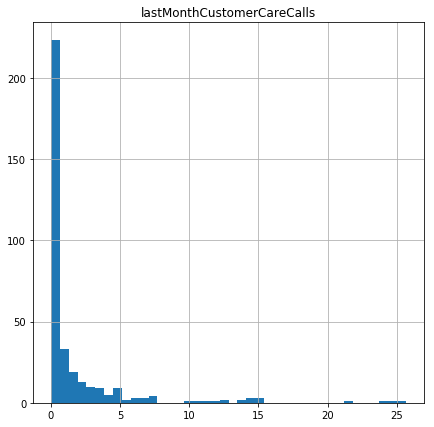

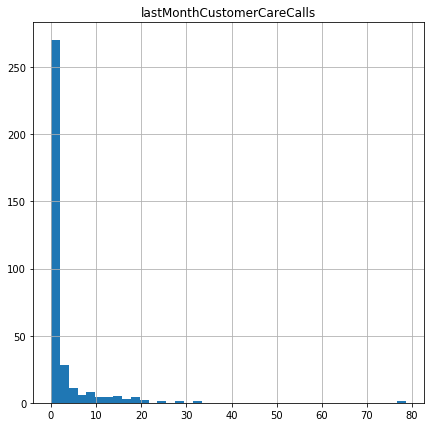

In [76]:
df_training[df_training['churn'] == True][['lastMonthCustomerCareCalls']].hist(figsize=(7,7), bins=40)
df_training[df_training['churn'] == False][['lastMonthCustomerCareCalls']].hist(figsize=(7,7), bins=40)

In [77]:
df_dummyt = df_training[(df_training['lastMonthCustomerCareCalls']>15)&(df_training['churn']==True)]

In [78]:
df_dummyf = df_training[(df_training['lastMonthCustomerCareCalls']>15)&(df_training['churn']==False)]

In [79]:
df_dummyt.shape

(4, 30)

In [80]:
df_dummyf.shape

(15, 30)